### Created by: Anthony D. Cho
### Last update: 27.11.2021

**Subject**: Classification (Keras - Tensorflow) - Applied to Breast Cancer Coimbra


In [1]:
import warnings
warnings.filterwarnings('ignore')

from time import time
from numpy import argmax
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

## Encoding function
from sklearn.preprocessing import LabelBinarizer # dummy Encoding

## Pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import classification_report, confusion_matrix

## Keras from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

## Regularizer
from tensorflow.keras.regularizers import L1

## Optimizer
from tensorflow.keras.optimizers import Adam

### Customized function

In [2]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

# Problem: Breast Cancer Coimbra

**Target**: Classification (1: No, 2: Yes)

## Data loading

Source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [3]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

## Feature names list
feature_names = data.columns[:-1]

In [4]:
data.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


## Data pre-processing

In [5]:
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20200803)

## Standardizing
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## One-Hot Encoder
labelsY = y_train.unique().sort()
y_train = to_categorical(y_train)[:,-2:]
y_test = to_categorical(y_test)[:,-2:]

## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (87, 9), y: (87, 2)
(test shape) X: (29, 9), y: (29, 2)


### Model building

In [6]:
## Model instance

model = Sequential(name='Classification')
model.add(layers.Input( shape=(X_train.shape[1],), name='Input' ))
model.add(layers.Dense(units=64, 
                       activation='relu', 
                       name='HiddenLayer_1'))
model.add(layers.Dropout(0.25, name='Dropout_1'))
model.add(layers.Dense(units=16, 
                       activation='relu',
                       name='HiddenLayer_2'))
model.add(layers.Dropout(0.1, name='Dropout_2'))
model.add(layers.Dense(units=2,
                       activation='softmax', kernel_regularizer=L1(0.0001),
                       name='output'))
model.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 64)                640       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 16)                1040      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 2)                 34        
Total params: 1,714
Trainable params: 1,714
Non-trainable params: 0
_________________________________________________________________


In [7]:
start = time()

## Compiler setting
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## model fitting
history = model.fit(x=X_train, y=y_train, 
                    validation_split=0.15,
                    epochs=200, 
                    batch_size=10)

stop = time()
print('Time spent[s]: {:2f}'.format(stop -start))

Epoch 1/200
8/8 [==============================] - 1s 80ms/step - loss: 0.7263 - accuracy: 0.4341 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5048 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.5470 - val_loss: 0.7045 - val_accuracy: 0.5000
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7243 - accuracy: 0.4309 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6652 - accuracy: 0.5768 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.5978 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.6322 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.1280 - accuracy: 0.9885 - val_loss: 0.6696 - val_accuracy: 0.8571
Epoch 118/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1795 - accuracy: 0.9646 - val_loss: 0.6798 - val_accuracy: 0.8571
Epoch 119/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1943 - accuracy: 0.9576 - val_loss: 0.6881 - val_accuracy: 0.8571
Epoch 120/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2054 - accuracy: 0.9198 - val_loss: 0.6928 - val_accuracy: 0.7857
Epoch 121/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3169 - accuracy: 0.8328 - val_loss: 0.6927 - val_accuracy: 0.8571
Epoch 122/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1826 - accuracy: 0.9208 - val_loss: 0.6930 - val_accuracy: 0.8571
Epoch 123/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2882 - accuracy: 0.8507 - val_loss: 0.7058 - val_accuracy: 0.8571
Epoch 124/200
8/8 [========

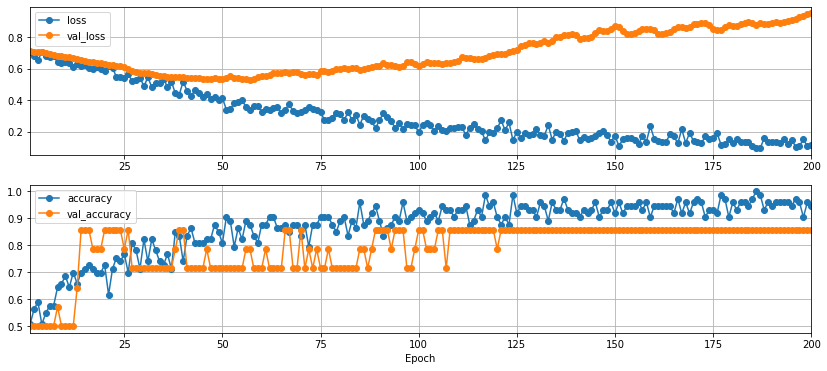

1/1 [==============================] - 0s 17ms/step - loss: 1.3682 - accuracy: 0.7586


[1.3682091236114502, 0.7586206793785095]

In [8]:
plot_history(history, width=14)

## Compute model evaluation using test set
model.evaluate(X_test, y_test)

In [9]:
## Compute predictions using test data
prediction = model.predict(X_test)
prediction

array([[9.75150466e-01, 2.48495620e-02],
       [9.82773185e-01, 1.72267519e-02],
       [4.81540477e-03, 9.95184600e-01],
       [1.05745360e-01, 8.94254625e-01],
       [6.72764936e-03, 9.93272364e-01],
       [9.35570002e-01, 6.44299313e-02],
       [9.86376136e-08, 9.99999881e-01],
       [9.82037663e-01, 1.79623403e-02],
       [8.40093417e-05, 9.99915957e-01],
       [4.76501845e-02, 9.52349842e-01],
       [9.92575765e-01, 7.42427120e-03],
       [3.47764879e-01, 6.52235091e-01],
       [1.19307870e-03, 9.98806953e-01],
       [1.58980384e-01, 8.41019630e-01],
       [3.91384065e-01, 6.08615935e-01],
       [1.22164395e-02, 9.87783611e-01],
       [3.38909333e-04, 9.99661088e-01],
       [9.99440491e-01, 5.59517590e-04],
       [6.14840508e-01, 3.85159463e-01],
       [9.58485782e-01, 4.15142924e-02],
       [1.31372973e-01, 8.68627012e-01],
       [7.42719471e-01, 2.57280469e-01],
       [9.40680027e-01, 5.93200549e-02],
       [1.33436476e-03, 9.98665690e-01],
       [1.267994

In [10]:
## Decodifying prediction to class
predictionClass = argmax(prediction, axis=1)
print(predictionClass)

## y_true labels
y_true = argmax(y_test, axis=1)
print(y_true)

[0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0]
[0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0]


In [11]:
## Display confusion matrix
confusion_matrix(y_true=y_true, y_pred=predictionClass)

array([[ 8,  4],
       [ 3, 14]])

In [12]:
## Display classification report
print(classification_report(y_true=y_true, y_pred=predictionClass))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.78      0.82      0.80        17

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29



## Best model

Looking into the performance charts, it seems to stabilize (kind of overfit) starting at epoch 48.

In [13]:
## Model instance

model = Sequential(name='Classification')
model.add(layers.Input( shape=(X_train.shape[1],), name='Input' ))
model.add(layers.Dense(units=64, 
                       activation='relu', 
                       name='HiddenLayer_1'))
model.add(layers.Dropout(0.25, name='Dropout_1'))
model.add(layers.Dense(units=16, 
                       activation='relu',
                       name='HiddenLayer_2'))
model.add(layers.Dropout(0.1, name='Dropout_2'))
model.add(layers.Dense(units=2,
                       activation='softmax', kernel_regularizer=L1(0.0001),
                       name='output'))
model.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 64)                640       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 16)                1040      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 2)                 34        
Total params: 1,714
Trainable params: 1,714
Non-trainable params: 0
_________________________________________________________________


In [14]:
start = time()

## Compiler setting
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## model fitting
history = model.fit(x=X_train, y=y_train, 
                    epochs=48, 
                    batch_size=10)

stop = time()
print('Time spent[s]: {:2f}'.format(stop -start))

Epoch 1/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5970
Epoch 2/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5399
Epoch 3/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5564
Epoch 4/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5539
Epoch 5/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6842
Epoch 6/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6424
Epoch 7/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5729
Epoch 8/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6314
Epoch 9/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6371
Epoch 10/48
9/9 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7131
Epoch 11/48
9/9 [======================

In [15]:
## Compute predictions using test data
prediction = model.predict(X_test)
prediction

## Decodifying prediction to class
predictionClass = argmax(prediction, axis=1)

## Display confusion matrix
confusion_matrix(y_true=y_true, y_pred=predictionClass)

array([[ 8,  4],
       [ 4, 13]])

In [16]:
## Display classification report
print(classification_report(y_true=y_true, y_pred=predictionClass))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.76      0.76      0.76        17

    accuracy                           0.72        29
   macro avg       0.72      0.72      0.72        29
weighted avg       0.72      0.72      0.72        29

